## Corner Detection
Looking for corners in image.

**What is a corner?**
A corner can be interpreted as the junction of two edges, where an edge is an sudden change in image brightness.

* There are various corner detection.
* We will take a look at some of the most popular algorithms:
    * Harris Corner Detection
    * Shi-Tomasi Corner Detection
    
**Harris Corner Detection**

* Published in 1988 by Chris Harris and Mike Stephen.
* The basic intuition is that corners can be detected by looking for significant change in all directions.

**Shi-Tomasi Corner Detection**

* Published in 1994 by J.Shi and C.Tomasi in their paper Good feature to track
* It made a small modification to the Harris Corner Detection which ended up with better results

In [1]:
# Import all the tools
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

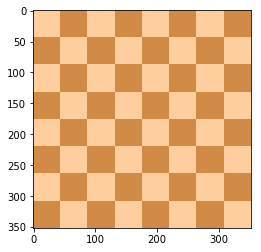

In [3]:
# Import flat chess image
flat_chess=cv2.imread("flat_chessboard.png")
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_chess=cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

plt.imshow(flat_chess)

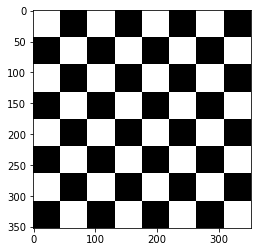

In [5]:
plt.imshow(gray_chess,cmap='gray')

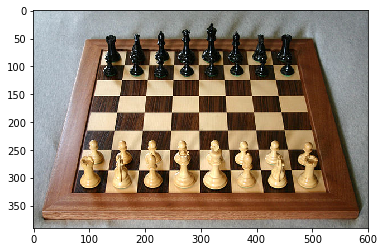

In [7]:
# Image of the real chess 
real_chess=cv2.imread("real_chessboard.jpg")
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
real_gray=cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(real_chess)

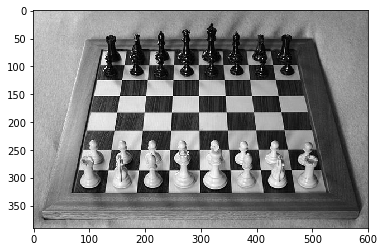

In [9]:
plt.imshow(real_gray,cmap='gray')

In [10]:
# Convert image dtype of image from int to dtype because corner detection needs float values
gray=np.float32(gray_chess)

In [11]:
gray

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)